In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# CSV 파일 읽기
df = pd.read_csv("online_shoppers_intention.csv")  # 데이터 불러오기

# 타깃 변수 Revenue를 0/1로 변환
df['Revenue'] = df['Revenue'].astype(int)

# 수치형/범주형 피처 구분
numeric_features = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay'
]

categorical_features = [
    'Month', 'OperatingSystems', 'Browser',
    'Region', 'TrafficType', 'VisitorType', 'Weekend'
]

# 범주형 컬럼을 문자열로 변환 (OneHotEncoder 처리를 위해)
for col in categorical_features:
    df[col] = df[col].astype(str)

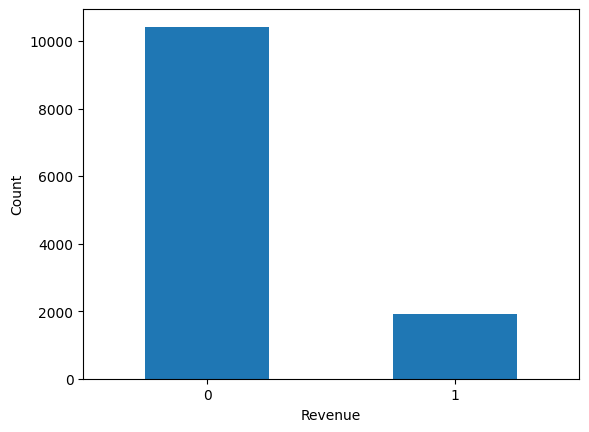

In [3]:
# 1. 타깃 변수 분포 (클래스 불균형)
plt.figure()
df['Revenue'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()


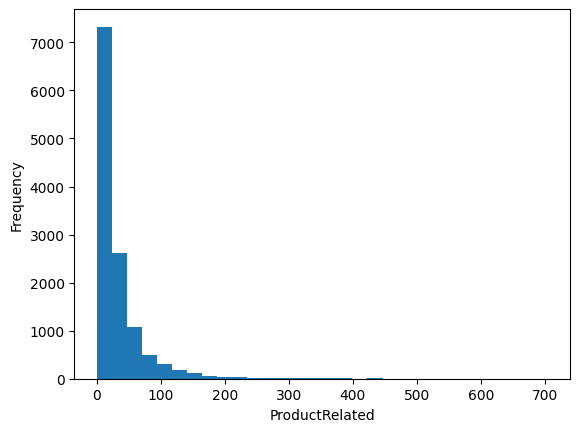

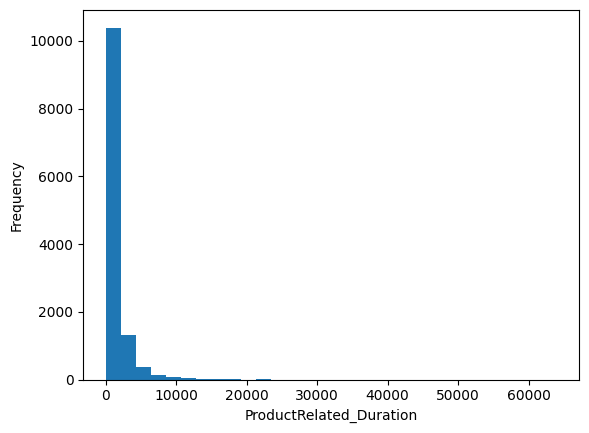

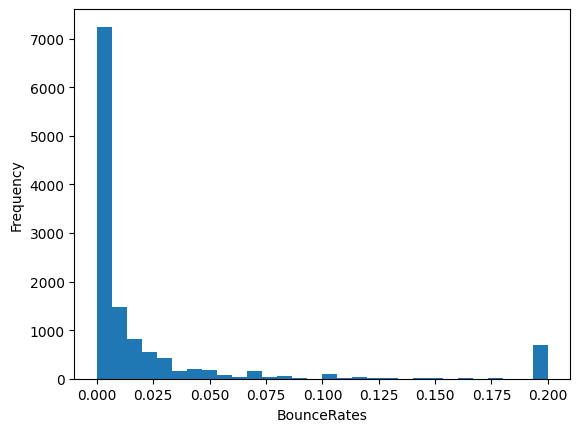

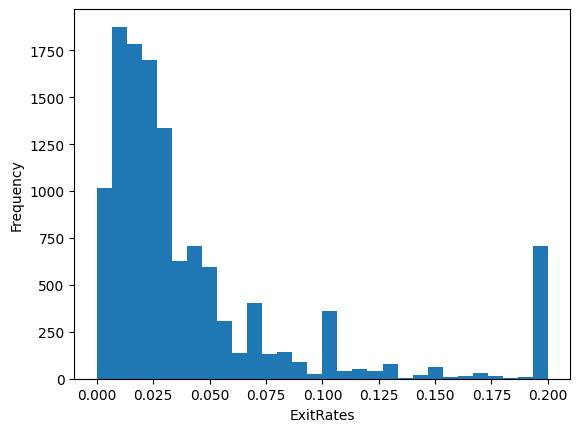

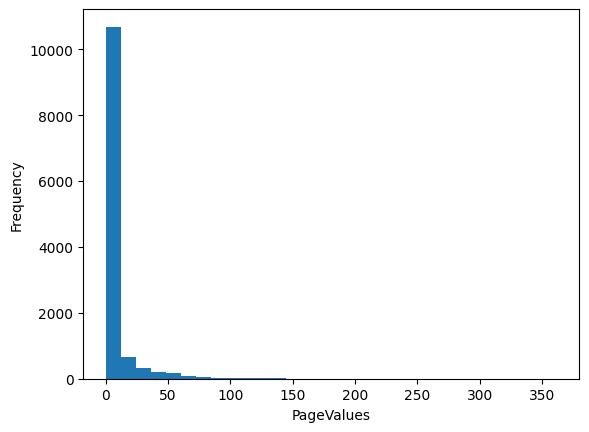

In [4]:
# 2. 수치형 변수 분포 (히스토그램)
num_cols = ['ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues']

for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


<Figure size 640x480 with 0 Axes>

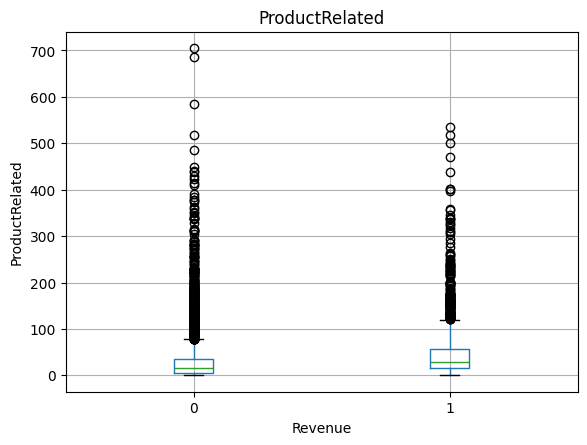

<Figure size 640x480 with 0 Axes>

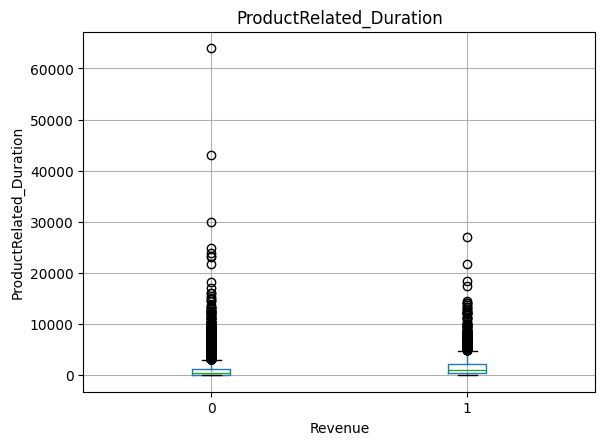

<Figure size 640x480 with 0 Axes>

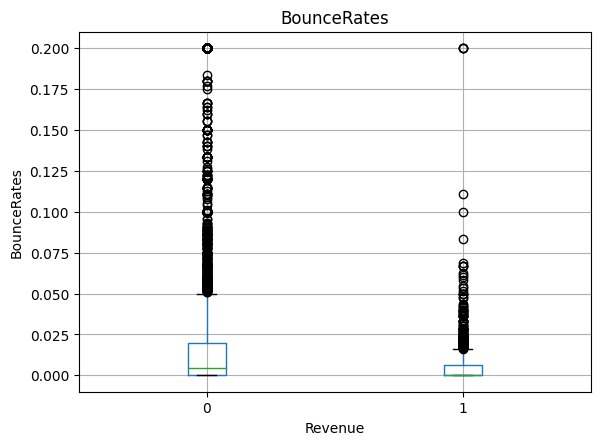

<Figure size 640x480 with 0 Axes>

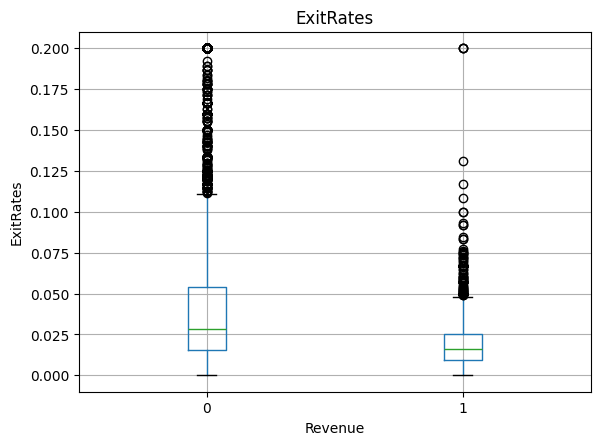

<Figure size 640x480 with 0 Axes>

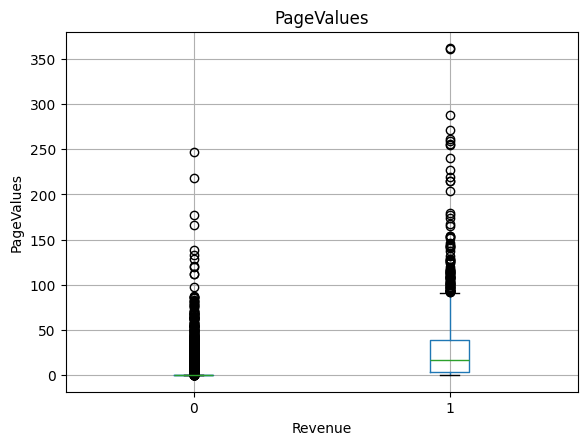

In [5]:
# 3. 구매/비구매에 따른 수치형 변수 비교 (박스플롯)
for col in num_cols:
    plt.figure()
    df.boxplot(column=col, by='Revenue')
    plt.suptitle('')
    plt.xlabel('Revenue')
    plt.ylabel(col)
    plt.show()


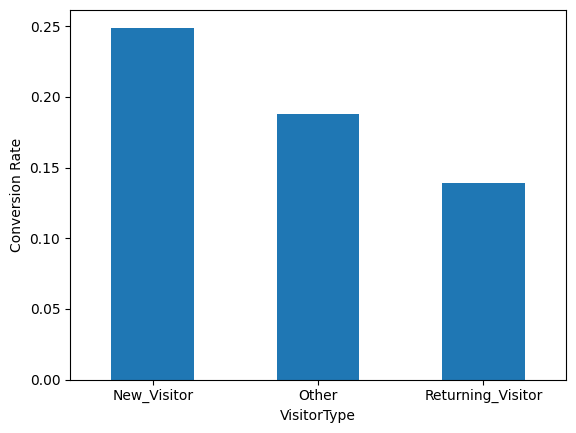

In [6]:
# 4. VisitorType별 구매 전환율
visitor_conv = df.groupby('VisitorType')['Revenue'].mean()

plt.figure()
visitor_conv.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Conversion Rate')
plt.show()


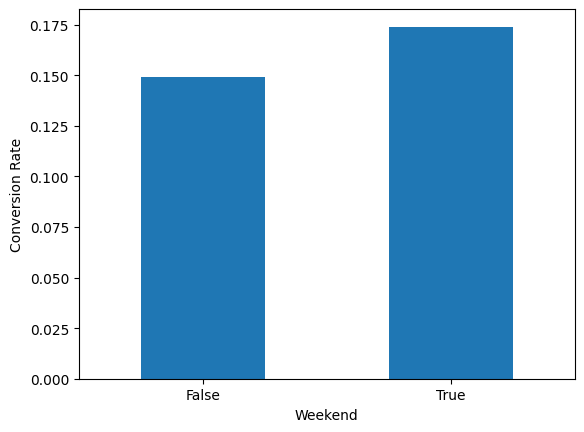

In [7]:
# 5. 주말 vs 평일 구매 전환율
weekend_conv = df.groupby('Weekend')['Revenue'].mean()

plt.figure()
weekend_conv.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Conversion Rate')
plt.show()


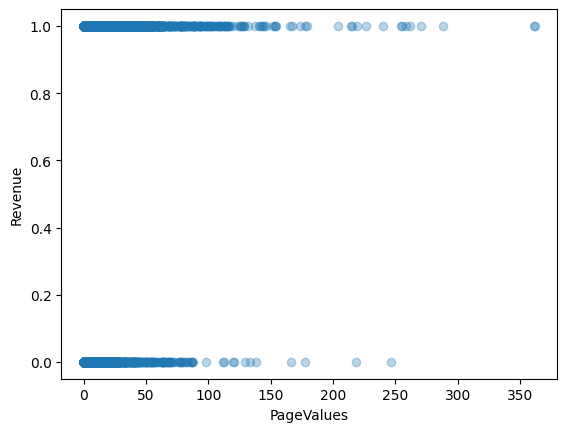

In [8]:
# 6. PageValues와 구매 전환 관계 (산점도)
plt.figure()
plt.scatter(df['PageValues'], df['Revenue'], alpha=0.3)
plt.xlabel('PageValues')
plt.ylabel('Revenue')
plt.show()


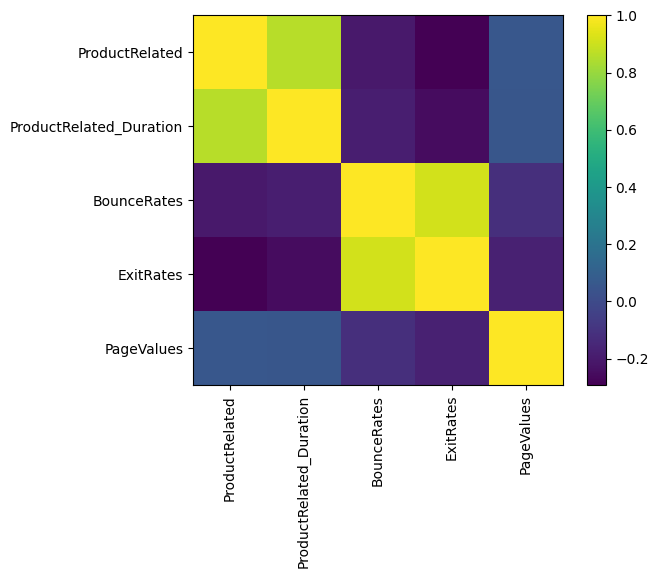

In [9]:
# 7. 핵심 수치형 변수 간 상관관계 (히트맵 대체: plt만 사용)
corr = df[num_cols].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.show()
